In [13]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler, LabelEncoder

df = pd.read_csv(r"C:\Users\DELL\Downloads\archive (2)\Expanded_data_with_more_features.csv")

df.head()

,Unnamed: 0,Gender,EthnicGroup,ParentEduc,LunchType,TestPrep,ParentMaritalStatus,PracticeSport,IsFirstChild,NrSiblings,TransportMeans,WklyStudyHours,MathScore,ReadingScore,WritingScore
0,0,female,NaN,bachelor's degree,standard,none,married,regularly,yes,3.0,school_bus,< 5,71,71,74
1,1,female,group C,some college,standard,NaN,married,sometimes,yes,0.0,NaN,5 - 10,69,90,88
2,2,female,group B,master's degree,standard,none,single,sometimes,yes,4.0,school_bus,< 5,87,93,91
3,3,male,group A,associate's degree,free/reduced,none,married,never,no,1.0,NaN,5 - 10,45,56,42
4,4,male,group C,some college,standard,none,married,sometimes,yes,0.0,school_bus,5 - 10,76,78,75


In [14]:
df.isnull().sum()

Unnamed: 0                0
Gender                    0
EthnicGroup            1840
ParentEduc             1845
LunchType                 0
TestPrep               1830
ParentMaritalStatus    1190
PracticeSport           631
IsFirstChild            904
NrSiblings             1572
TransportMeans         3134
WklyStudyHours          955
MathScore                 0
ReadingScore              0
WritingScore              0
dtype: int64

In [15]:
print(df['EthnicGroup'].mode())
print(df['ParentEduc'].mode())
print(df['TestPrep'].mode())
print(df['ParentMaritalStatus'].mode())
print(df['PracticeSport'].mode())
print(df['IsFirstChild'].mode())
print(df['TransportMeans'].mode())
print(df['WklyStudyHours'].mode())

0    group C
Name: EthnicGroup, dtype: object
0    some college
Name: ParentEduc, dtype: object
0    none
Name: TestPrep, dtype: object
0    married
Name: ParentMaritalStatus, dtype: object
0    sometimes
Name: PracticeSport, dtype: object
0    yes
Name: IsFirstChild, dtype: object
0    school_bus
Name: TransportMeans, dtype: object
0    5 - 10
Name: WklyStudyHours, dtype: object


In [16]:
df.fillna(
    {
    'EthnicGroup': "group C",
    'ParentEduc': "some college",
    'ParentMaritalStatus': "married",
     'TestPrep': "none",
     'PracticeSport': "sometimes",
     'IsFirstChild': "yes",
     'TransportMeans': "school_bus",
     'WklyStudyHours': "5 - 10",
    }
,inplace = True)

df['NrSiblings'] = df['NrSiblings'].fillna(df['NrSiblings'].mean())

df.isnull().sum()

Unnamed: 0             0
Gender                 0
EthnicGroup            0
ParentEduc             0
LunchType              0
TestPrep               0
ParentMaritalStatus    0
PracticeSport          0
IsFirstChild           0
NrSiblings             0
TransportMeans         0
WklyStudyHours         0
MathScore              0
ReadingScore           0
WritingScore           0
dtype: int64

In [17]:
df['NrSiblings'] = df['NrSiblings'].astype(int)

In [18]:
df.drop(columns=['Unnamed: 0'], inplace=True)

In [19]:
# Converting textual columns to numeric values using encoding
label_encoder = LabelEncoder()

df['Gender'] = label_encoder.fit_transform(df['Gender'])
df['EthnicGroup'] = label_encoder.fit_transform(df['EthnicGroup'].astype(str))
df['ParentEduc'] = label_encoder.fit_transform(df['ParentEduc'].astype(str))
df['LunchType'] = label_encoder.fit_transform(df['LunchType'].astype(str))
df['TestPrep'] = label_encoder.fit_transform(df['TestPrep'].astype(str))
df['ParentMaritalStatus'] = label_encoder.fit_transform(df['ParentMaritalStatus'].astype(str))
df['PracticeSport'] = label_encoder.fit_transform(df['PracticeSport'].astype(str))
df['IsFirstChild'] = label_encoder.fit_transform(df['IsFirstChild'].astype(str))
df['TransportMeans'] = label_encoder.fit_transform(df['TransportMeans'].astype(str))
df['WklyStudyHours'] = label_encoder.fit_transform(df['WklyStudyHours'].astype(str))

#####################

X = df.drop('MathScore', axis=1)
y = df['MathScore']

In [20]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

k = 18 # Number of neighbors
knn = KNeighborsRegressor(n_neighbors = k, weights = 'distance', metric = 'minkowski', p = 1)

# Train the model
knn.fit(X_train, y_train)

# Make predictions on the test set
Y_pred = knn.predict(X_test)

In [21]:
mae = mean_absolute_error(y_test, Y_pred)
mse = mean_squared_error(y_test, Y_pred)
r2 = r2_score(y_test, Y_pred)

print(f"Mean Squared Error: {mse}")
print(f"Mean Absolute Error: {mae}")
print(f"R-squared: {r2}")

Mean Squared Error: 40.82159088210997
Mean Absolute Error: 5.083473927663393
R-squared: 0.8268385036813763


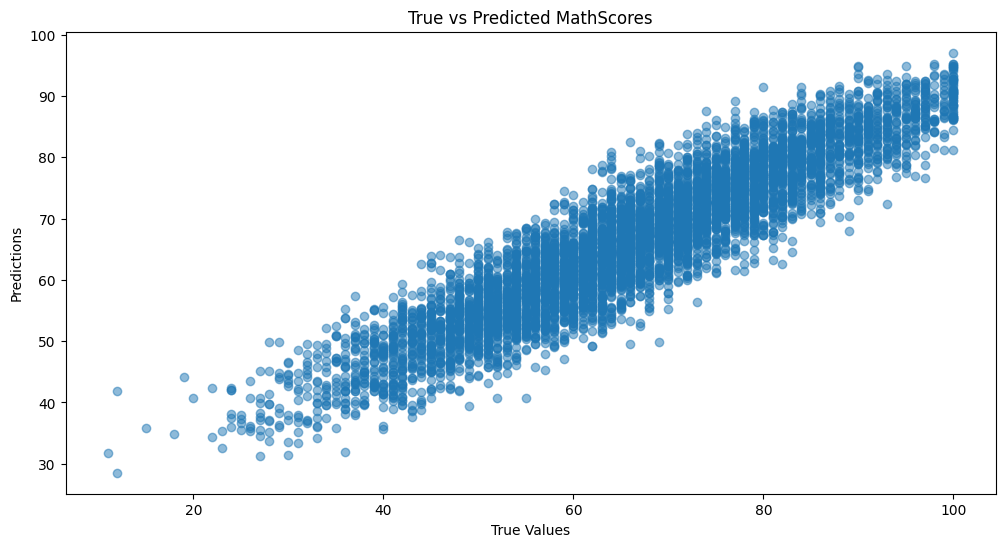

In [22]:
plt.figure(figsize=(12, 6))
plt.scatter(y_test, Y_pred,alpha=0.5)
plt.xlabel("True Values")
plt.ylabel("Predictions")
plt.title("True vs Predicted MathScores")
plt.show()